In [1]:
#Checking to see if cloud instance is working :) 
print('Hello')

Hello


In [41]:
from datetime import datetime, timedelta
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Processing and Mining with Big Query

In [7]:
#Creating a credential object from a specific key_path where the credential json file is located
from google.cloud import bigquery
from google.oauth2 import service_account
key_path='../credential/Xpring Dev Sandbox-edb2a98acf17.json'
credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

In [5]:
key_path

'../credential/Xpring Dev Sandbox-edb2a98acf17.json'

In [6]:
#Checking to see if credential file exists
import os.path
from os import path

path.exists(key_path)

True

In [11]:
def gbq_query(query,cred, query_params=None):
    """
    Run a query against Google Big Query, returning a pandas dataframe of the result.

    Parameters
    ----------
    query: str
        The query string
    cred: obj
        Credential class instance
    
    query_params: list, optional
        The query parameters to pass into the query string
    """
    client = bigquery.Client(credentials=cred)
    job_config = bigquery.QueryJobConfig()
    job_config.query_parameters = query_params
    return client.query(query, job_config=job_config).to_dataframe()

In [51]:
#Dates that query data will fall between
start_date='2019-12-15'
end_date='2019-12-27'

In [52]:
#Query and query_parameters
query = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"
AND TxnSignature IS NOT NULL
AND Destination IS NOT NULL
AND AmountXRP  IS NOT NULL
AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)


ORDER BY TimeStamp
LIMIT 1000;
"""
query_params = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]


In [53]:
xrp = gbq_query(query,credentials,query_params)
xrp

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex
0,2019-12-15 00:00:00+00:00,rPsmHDMkheWZvbAkTA8A9bVnUdadPn7XBK,rUMhAy8zECaY9u6ntqTAXFu1t8gixCeHka,10,304502210089A1985CB7AF1F667C61405FB4A609F06DEB...,48560300000,52058308
1,2019-12-15 00:00:01+00:00,rEvoRfi83Hc5gxqpwRtc9jh7Z4C2hECCWY,rnuPTVikw8HKK4hBGCtnq2J2433VYaZPZQ,12,304402203E8C80A7E4F36EEB754BCA9EF3CB2D5B2BFA08...,999999,52058309
2,2019-12-15 00:00:01+00:00,rw2ciyaNshpHe7bCHo4bRWq6pqqynnWKQg,rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,40,3045022100AEF609203571841221F6D13CD5991EE66AAF...,50000083642,52058309
3,2019-12-15 00:00:10+00:00,ryBANkk28Mj71jRKAkt13U1X9ubztsGWZ,rwU8rAiE2eyEPz3sikfbHuqCuiAtdXqa2v,7707,304402203D711CFEB876FFC22375F0C8C3CC3B1DB8952D...,15728776000,52058310
4,2019-12-15 00:00:11+00:00,rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,rwpMvfxoodXggJ1g4qv6MWAPQqWDwQyHUW,40,3045022100F4BEBE96EF6610512BD07D789C1E2629342F...,1162250116,52058311
...,...,...,...,...,...,...,...
995,2019-12-15 01:20:40+00:00,rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,rU7xJs7QmjbiyxpEozNYUFQxaRD5kueY7z,200000,3044022042E953DD34BC42DFCB67071FF8A5572F1A9307...,96790306,52059536
996,2019-12-15 01:20:40+00:00,rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,rMdG3ju8pgyVh29ELPWaDuA74CpWW6Fxns,200000,3044022015EE58FA708018EF55241EDD23281D95989382...,82766900,52059536
997,2019-12-15 01:20:40+00:00,rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,rDsbeomae4FXwgQTJp9Rs64Qg9vDiTCdBv,200000,3044022043BB41D7229D7433B594C3DD866F46BC6FA951...,4636750000,52059536
998,2019-12-15 01:20:40+00:00,rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,rQrQMKhcw3WnptGeWiYSwX5Tz3otyJqPnq,200000,3044022019F15D308AE593BF1EE0E5D7DC89924E605CD1...,82966700,52059536


In [11]:
def datetotime(col):
    #returns a list of datetime objects
    #takes in a df column
    x=[]
    for entry in col:
        x.append(datetime.strptime(entry,'%Y-%m-%d %H:%M:%S'))
    return x

In [12]:
#Replaces xrp timestamp list with a list of strings
xrp['TimeStamp']= [str(x)[:19] for x in xrp['TimeStamp']]

In [13]:
xrp['TimeStamp'][1]

'2019-12-15 00:00:01'

In [14]:
#Converts strings into datetime objects using strptime
xrp['TimeStamp']=datetotime(xrp['TimeStamp'])

In [18]:
xrp['LedgerIndex'][0]

52058308

In [30]:
xrp.loc(0)[4]

TimeStamp                                     2019-12-15 00:00:11
Account                        rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w
Destination                    rwpMvfxoodXggJ1g4qv6MWAPQqWDwQyHUW
Fee                                                            40
TxnSignature    3045022100F4BEBE96EF6610512BD07D789C1E2629342F...
AmountXRP                                              1162250116
LedgerIndex                                              52058311
Name: 4, dtype: object

## CloseTime Distribution

In [8]:
start_date='2019-12-15'
end_date='2019-12-27'

In [17]:
query2 = """
Select *, TIMESTAMP(CloseTime) as `TimeStamp`
From
xrpledgerdata.fullhistory.ledgers

Where TIMESTAMP(CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(CloseTime) <=TIMESTAMP(@end_date)
Order by LedgerIndex
LIMIT 100000

"""
query_params2 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]


In [18]:
ledgerdf = gbq_query(query2,credentials,query_params2)
ledgerdf

,LedgerIndex,hash,CloseTime,CloseTimeTimestamp,CloseTimeHuman,TotalCoins,ParentHash,AccountHash,TransactionHash,TimeStamp
0,52058308,9A1BFC911AB308782606348E63986DAFA8EE111689702B...,2019-12-15 00:00:00,629686800,2019-Dec-15 01:00:00.000000000,99991147585829680,2C653C7E116AEDD3DC0FEDB98F400D5DA11D07DCAB6298...,7B1F69E60321EFA03CE917CBFC119B375612315BF93F03...,DA2719A56038A9B5603E38D35AD4B6C3FA7119272E41C3...,2019-12-15 00:00:00+00:00
1,52058309,5D9B277B92014EA116EF15935670F3BFAE76C93DBE17BC...,2019-12-15 00:00:01,629686801,2019-Dec-15 01:00:01.000000000,99991147585735540,9A1BFC911AB308782606348E63986DAFA8EE111689702B...,3BC6B3D00C4D770A65CC7903241570EC3DBEC44BD874AD...,58821251ACF2C4D886B26BBB7BF4197283D748D2E3C58F...,2019-12-15 00:00:01+00:00
2,52058310,43A871FE577FC1E710A048E4E7381A0F3393D244672CE2...,2019-12-15 00:00:10,629686810,2019-Dec-15 01:00:10.000000000,99991147585531540,5D9B277B92014EA116EF15935670F3BFAE76C93DBE17BC...,A532CED21EAA41AC33B21597FDAD08F0B822E1388C3D00...,A647B66ACEAD89968D94B95A305E6B48A0E751115BBCE3...,2019-12-15 00:00:10+00:00
3,52058311,E8171001FCBC6206D56F73921715F936500EEF6B3A480C...,2019-12-15 00:00:11,629686811,2019-Dec-15 01:00:11.000000000,99991147585459420,43A871FE577FC1E710A048E4E7381A0F3393D244672CE2...,6C88AAB4CB8B19A7B96819F73D4C6E05CF8AD40B1A1F6D...,C2AE4B34ABBF387EBF4105686F0AE9BC77D01058397677...,2019-12-15 00:00:11+00:00
4,52058312,B59E4CABDDD6A5147360FAF018608671DD8A417BD5BFB2...,2019-12-15 00:00:12,629686812,2019-Dec-15 01:00:12.000000000,99991147585458560,E8171001FCBC6206D56F73921715F936500EEF6B3A480C...,302D92CBC5C5CB4240A101B682CC62F3C0A4C708295ECD...,8070F8A573C330088C023591543FA98E49219A6CCE3928...,2019-12-15 00:00:12+00:00
...,...,...,...,...,...,...,...,...,...,...
99995,52158303,4826741EBB2F579DFD6A5409C5BF15CA8CE786537E86FB...,2019-12-19 13:36:20,630081380,2019-Dec-19 14:36:20.000000000,99991140203170610,7E4CF63C10E921503762863B4944F60C06B47CA813F970...,92C5EA812E709C326B162AD72566FEF1F7259997034DB4...,5D3B05FF59204E01AB84E41CC49ECC054C4701A19860FF...,2019-12-19 13:36:20+00:00
99996,52158304,BF0400FA4FF9475F3BAC6B9191E4E0A0F7138357BE195E...,2019-12-19 13:36:21,630081381,2019-Dec-19 14:36:21.000000000,99991140203168770,4826741EBB2F579DFD6A5409C5BF15CA8CE786537E86FB...,25E04AC8AFAC48C82E788B2C0C0C80F4D2DD140BA3E2A0...,0AECC03C85A1CCBBB53B245FBEDD7BBEFC25B0AB8FC017...,2019-12-19 13:36:21+00:00
99997,52158305,EE4466E1D2B4D5CBBFA56353CF54BEEF742C85FF2BCD88...,2019-12-19 13:36:30,630081390,2019-Dec-19 14:36:30.000000000,99991140203166700,BF0400FA4FF9475F3BAC6B9191E4E0A0F7138357BE195E...,BD25E1187788B78A864D04A6137816EE3593D854897DA1...,9286D9539699F33197174375FC9F0AB55FF33960D2285F...,2019-12-19 13:36:30+00:00
99998,52158306,E83A53CFDBAF54BFD8F60A3A4BCC07ACABD594ED8F837F...,2019-12-19 13:36:31,630081391,2019-Dec-19 14:36:31.000000000,99991140203165010,EE4466E1D2B4D5CBBFA56353CF54BEEF742C85FF2BCD88...,1E23BC1F9271E5C5CC9CC63C35DD2CDE6320AE86CEF4A8...,C698333CA77428CBD3BBC68835DA32FFADD9D3F61C5AE9...,2019-12-19 13:36:31+00:00


In [31]:
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r

In [45]:
def plotclosetimedist(data):
    """
    Plot the distribution of closetime based on a ledger dataframe passed

    Parameters
    ----------
    data: dataframe
        The dataframe of ledgers that is being analyzed
    """
    UniqueLedgerIndex=np.unique(data['LedgerIndex'])
    closetimezeros=[0]*(len(UniqueLedgerIndex)-1)
    dicCloseTime = {k:v for k,v in zip(UniqueLedgerIndex,closetimezeros)}
    
    curledger=data['LedgerIndex'][0]
    curtime=data['TimeStamp'][0]
    for index,row in data.iterrows():
        if row['LedgerIndex']!=curledger:
            dicCloseTime[row['LedgerIndex']]=(row['TimeStamp']-curtime).total_seconds()
            curledger=row['LedgerIndex']
            curtime=row['TimeStamp']
        else:
            None
    foo=removekey(dicCloseTime,data['LedgerIndex'][0])
    plt.hist(foo.values(), color='g')
    plt.show()

        
        
    

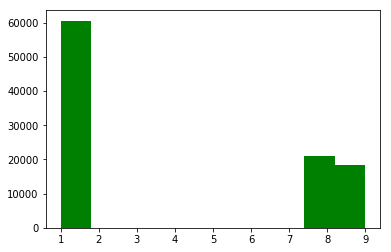

In [44]:
plotclosetimedist(ledgerdf)

## Calculating Sliding Window Account Balances

In [15]:
#Creating a merged a numpy array of unique account and destination hashes
UniqueAccount=np.unique(xrp['Account'])
UniqueDestination=np.unique(xrp['Destination'])
UniqueHash=np.unique(np.concatenate([UniqueDestination, UniqueAccount]))

In [16]:
#Creating a dictionary with account hashes as keys and account balances initialized at 0 as the values
#The value is an array of length 24 for each increment of time window that will be computed ()
UniqueHashList=UniqueHash.tolist()
listofzeros = [[0] *24 ]*len(UniqueHashList)
dicAccBal = {k:v for k,v in zip(UniqueHashList,listofzeros)}



In [112]:
#for each unique account hash
for each in UniqueHashList:
    #looking at 1 hour time windows from 0-23 hours from startime (which is the first rows time, currently static)
    for i in range(1,25):
        starttime = xrp['TimeStamp'][0]
        endtime = timedelta(hours = i+1 ) + starttime
        #iterate through each transaction
        for index, row in xrp.iterrows():
            #Checking if the transaction's timestamp is within time window specified by starttime and endtime
            if (row['TimeStamp'] < endtime) & (row['TimeStamp'] > starttime):
                #Adding account balances to respective dictionary balance
                dicAccBal[row['Account']][i] += (-1) * (row['AmountXRP'])
                dicAccBal[row['Destination']][i] += (1) * (row['AmountXRP'])

KeyboardInterrupt: 